In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.datasets.fashion_mnist

In [3]:
(Xtr,Ytr),(Xte,Yte) = dataset.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


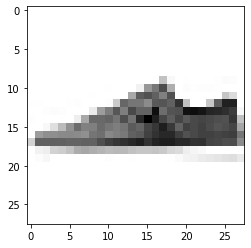

In [6]:
plt.imshow(Xtr[87] , cmap = plt.cm.binary)

In [7]:
Xtr = Xtr / 255.0
Xte = Xte / 255.0

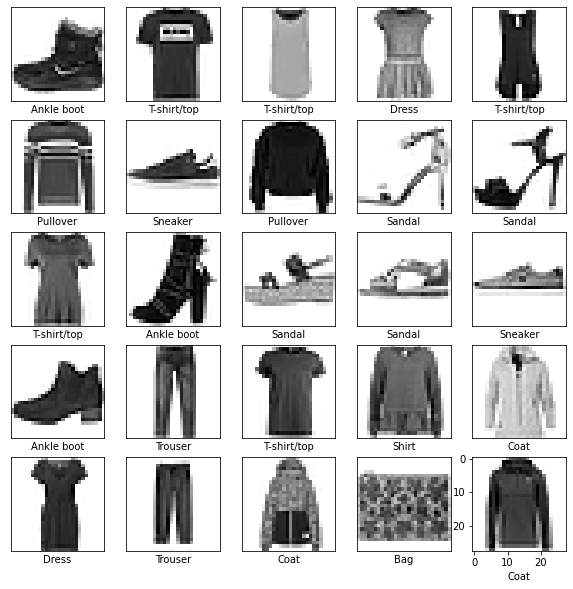

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,5,i+1)
    plt.imshow(Xtr[i] , cmap = plt.cm.binary)
    plt.xlabel(class_names[Ytr[i]])
plt.show()

In [9]:
# build model
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10)
                            ])


In [10]:
#compile
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [11]:
model.fit(Xtr,Ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4972 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3771 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3374 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3153 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2563 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [12]:
test_loss,test_acc = model.evaluate(Xte,Yte)
print('Test accuracy = ', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8783
Test accuracy =  0.8783000111579895


In [13]:
pred = model.predict(Xte)

In [14]:
pred[0]

array([ -7.2543726,  -8.43062  , -13.750331 , -12.132299 , -10.355703 ,
        -0.7474817,  -9.42581  ,   1.4893637,  -7.758328 ,   5.7959366],
      dtype=float32)

In [15]:
np.argmax(pred[0])

9

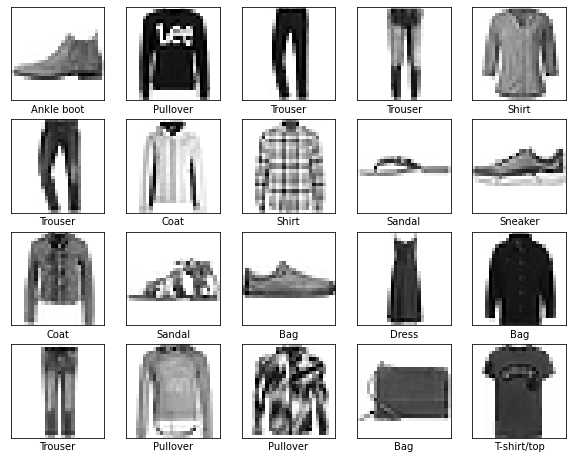

In [16]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Xte[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[np.argmax(pred[i])])
    

In [17]:
#add probabilistic model at the output
prob_model  = tf.keras.Sequential([
                                    model,
                                    tf.keras.layers.Softmax()
                                ])


In [18]:
pred = prob_model.predict(Xte)

In [19]:
print(pred[0])

[2.1178216e-06 6.5320802e-07 3.1969076e-09 1.6122510e-08 9.5279290e-08
 1.4183915e-03 2.4146053e-07 1.3281459e-02 1.2794535e-06 9.8529577e-01]


<BarContainer object of 10 artists>

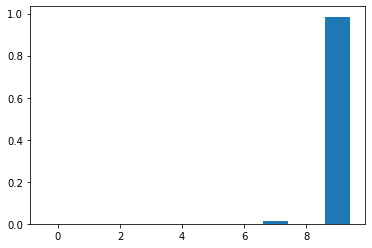

In [20]:
plt.bar(range(10),pred[0])

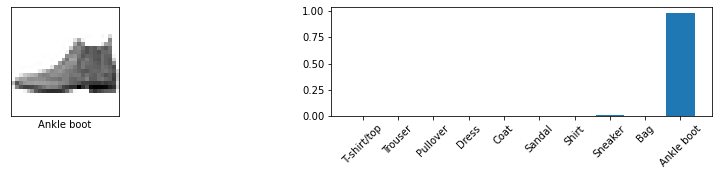

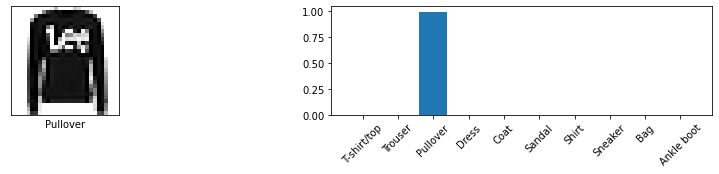

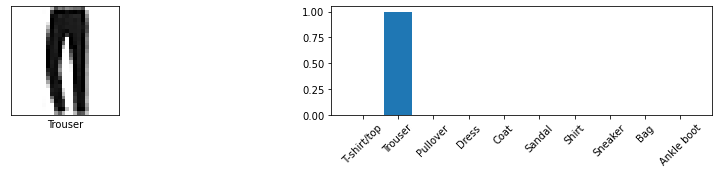

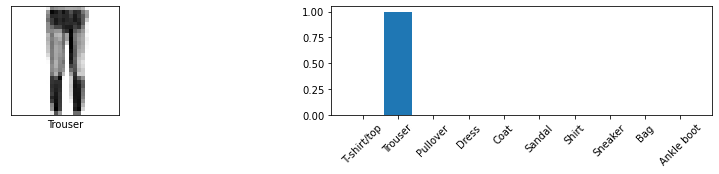

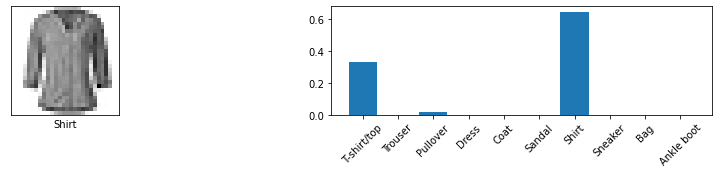

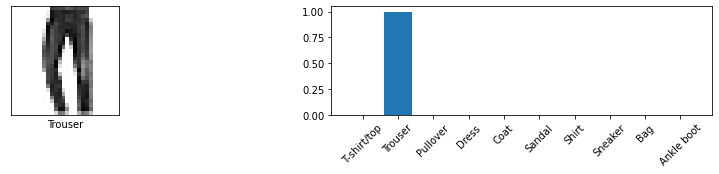

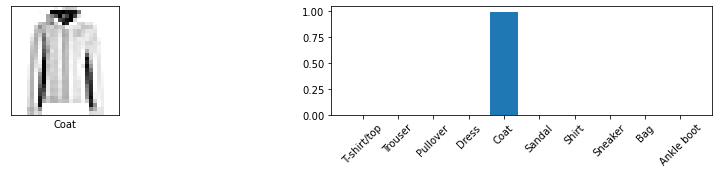

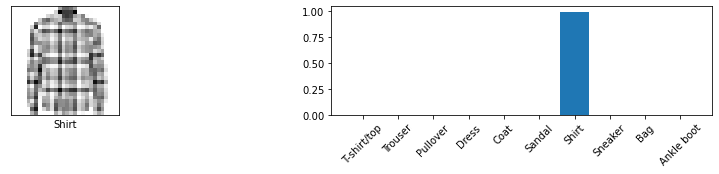

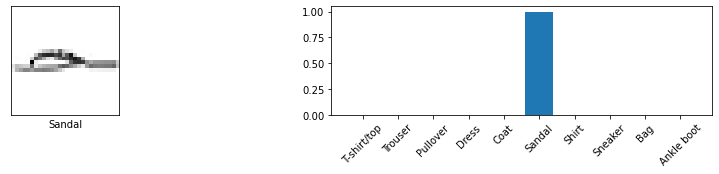

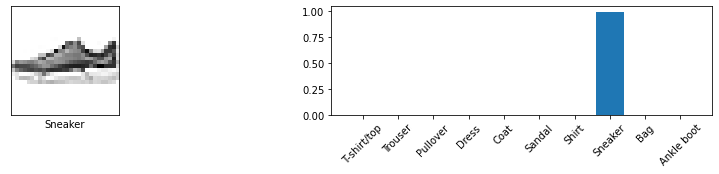

In [21]:
for i in range(0,10):
            plt.figure(figsize=(15 , 2))
            plt.subplot(1,2,1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(Xte[i],cmap = plt.cm.binary)
            plt.xlabel(class_names[np.argmax(pred[i])])
            plt.subplot(1,2,2)
            plt.bar(range(10),pred[i])
            plt.xticks(range(10),class_names,rotation=45)
        